# Load data

Load data and replace NULL value to average data for field. Our data with UNKNOWN items(key=-9999) we ignore because we want to receive model for analysing data which would be insert correct. 

In [1]:
from sklearn import  cross_validation, grid_search, linear_model, metrics

import numpy as np
import pandas as pd

import mysql.connector
from mysql.connector import errorcode

C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Semenov.R\AppData\Local\Continuum\anaconda3\envs\yourenvname\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
cnx = mysql.connector.connect(user='sena', password='qWERtYhGfDsA12#', host='10.3.99.94', database='bookstore')
cursor = cnx.cursor()

query = ("with cte(countryid, Age, publisherID, balance, Raiting) as( "
"select dc.countryid, du.Age, db.publisherID, "
"row_number() over (partition by `Book-Rating`) balance, "
" `Book-Rating` as Raiting "
" from factrating f  "
" left join DimUsers du on (f.userid=du.userid) left join Dimcity dct on (du.cityid=dct.cityid) "
" left join DimState ds on (dct.stateid = ds.stateid) "
"left join Dimcountry dc on (ds.countryid=dc.countryid) "
"left join DimBooks db on (db.ISBN=f.isbn) "
"where dc.countryid>0 and db.publisherid >0) "
"select countryid, Age, publisherID, case when Raiting>=5 then 1 else 0 end Raiting from cte "
"where balance<10000; "         
)
 
cursor.execute(query)

from pandas import DataFrame
df = DataFrame(cursor.fetchall())
df.columns = ('countryid', 'Age', 'publisherID', 'Raiting')


cursor.close()
cnx.close()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

In [8]:
#replace null value to average. 
df['Age']=df['Age'].apply(lambda x:np.mean(df['Age']) if pd.isnull(x) else x)
df.isnull().values.any()

False

In [10]:
#save data
df.to_csv("buffer.csv")

In [11]:
#load dat
import pandas as pd

t=pd.read_csv("buffer.csv")
df =t[:100000].drop('Unnamed: 0', 1)

In [12]:
TRAIN_SIZE = 0.7 
from sklearn.cross_validation import train_test_split

y=df['Raiting'].values

#numerical field
num =df[['Age']]

In [13]:
categorical_cols=['countryid', 'publisherID']
# String Value
cat=pd.DataFrame()
for it in range(len(categorical_cols)):
    cat[categorical_cols[it]]=cat[categorical_cols[it]].astype('str')


#turn field into value of matrix
from sklearn.feature_extraction import DictVectorizer
enc = DictVectorizer(sparse = False)
enc_data = enc.fit_transform(cat.T.to_dict().values())
crat = pd.DataFrame(enc_data,  columns=enc.get_feature_names())

In [14]:
X  = pd.DataFrame(np.hstack((crat, num)))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

In [16]:
X_train.head(12)

,0,1,2,3,4,5,6,7,8,9,...,5269,5270,5271,5272,5273,5274,5275,5276,5277,5278
11193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.000000
80952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000
53884,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.000000
42452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.857658
11945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.000000
47727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
82420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.000000
42035,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.857658
17515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.000000
16695,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.857658


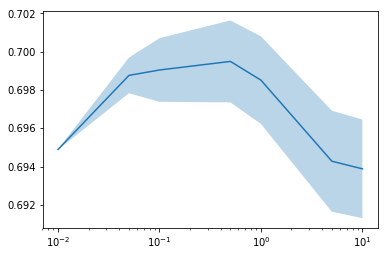

{'C': 0.5}
0.69949381794


In [17]:
#2 lets choose optimal params for our learning
estimator = LogisticRegression(penalty='l2')
optimiser =GridSearchCV(estimator, param_grid, cv=3) 
optimiser.fit(X_train, y_train)
plot_scores(optimiser)
print optimiser.best_params_
print optimiser.best_score_